# **Programming for Data Science**
## **Final Project**

**Student Information:**

Student D|Full Name
-|-
21127469|Vo Thanh Tu
22127117|Ly Lien Hoa
22127232|Le Thi Ngoc Linh

## **0. Import library and description**

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

## **1. Collecting Data** 

In [2]:
# Đọc dữ liệu  
sales_df = pd.read_csv('Data/sales.csv')  

# Hiển thị 5 dòng đầu tiên của mỗi dataset  
print("Sales Dataset:")  
print(sales_df.head())  

Sales Dataset:
   Customer ID  Age Gender Loyalty Member Product Type      SKU  Rating  \
0         1000   53   Male             No   Smartphone  SKU1004       2   
1         1000   53   Male             No       Tablet  SKU1002       3   
2         1002   41   Male             No       Laptop  SKU1005       3   
3         1002   41   Male            Yes   Smartphone  SKU1004       2   
4         1003   75   Male            Yes   Smartphone  SKU1001       5   

  Order Status Payment Method  Total Price  Unit Price  Quantity  \
0    Cancelled    Credit Card      5538.33      791.19         7   
1    Completed         Paypal       741.09      247.03         3   
2    Completed    Credit Card      1855.84      463.96         4   
3    Completed           Cash      3164.76      791.19         4   
4    Completed           Cash        41.50       20.75         2   

  Purchase Date Shipping Type              Add-ons Purchased  Add-on Total  
0    2024-03-20      Standard  Accessory,Accesso

## **2. Exploring Data Analysis (EDA)**

In [3]:
print("Sales Dataset Info:")  
print(sales_df.info()) 

Sales Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes:

In [4]:
print("\nSales Dataset Shape:", sales_df.shape)


Sales Dataset Shape: (20000, 16)


In [5]:
# Kiểm tra dữ liệu thiếu trong sales dataset  
print("Missing values in Sales Dataset:")  
print(sales_df.isnull().sum())  

# Tính phần trăm dữ liệu thiếu  
print("\nPercentage of missing values in Sales Dataset:")  
print((sales_df.isnull().sum() / len(sales_df)) * 100)  

Missing values in Sales Dataset:
Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

Percentage of missing values in Sales Dataset:
Customer ID           0.000
Age                   0.000
Gender                0.005
Loyalty Member        0.000
Product Type          0.000
SKU                   0.000
Rating                0.000
Order Status          0.000
Payment Method        0.000
Total Price           0.000
Unit Price            0.000
Quantity              0.000
Purchase Date         0.000
Shipping Type         0.000
Add-ons Purchased    24.340
Add-on Total          0.000
dtype: float64


In [6]:
# Thống kê mô tả cho biến số  
print("Sales Dataset Statistics:")  
print(sales_df.describe())  

Sales Dataset Statistics:
        Customer ID           Age        Rating   Total Price    Unit Price  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean   10483.526550     48.994100      3.093950   3180.133419    578.631867   
std     5631.732525     18.038745      1.223764   2544.978675    312.274076   
min     1000.000000     18.000000      1.000000     20.750000     20.750000   
25%     5478.000000     33.000000      2.000000   1139.680000    361.180000   
50%    10499.500000     49.000000      3.000000   2534.490000    463.960000   
75%    15504.000000     65.000000      4.000000   4639.600000    791.190000   
max    19998.000000     80.000000      5.000000  11396.800000   1139.680000   

           Quantity  Add-on Total  
count  20000.000000  20000.000000  
mean       5.485550     62.244848  
std        2.870854     58.058431  
min        1.000000      0.000000  
25%        3.000000      7.615000  
50%        5.000000     51.700000  
75%       

In [7]:
# Thống kê mô tả cho biến category  
print("\nSales Dataset Categorical Columns:")  
for col in sales_df.select_dtypes(include=['object']).columns:  
    print(f"\nValue counts for {col}:")  
    print(sales_df[col].value_counts()) 


Sales Dataset Categorical Columns:

Value counts for Gender:
Male      10164
Female     9835
Name: Gender, dtype: int64

Value counts for Loyalty Member:
No     15657
Yes     4343
Name: Loyalty Member, dtype: int64

Value counts for Product Type:
Smartphone    5978
Tablet        4104
Laptop        3973
Smartwatch    3934
Headphones    2011
Name: Product Type, dtype: int64

Value counts for SKU:
TBL345     2062
SKU1002    2042
SKU1004    2019
SKU1005    2012
HDP456     2010
SMP234     1987
SWT567     1980
SKU1001    1972
LTP123     1961
SKU1003    1955
Name: SKU, dtype: int64

Value counts for Order Status:
Completed    13432
Cancelled     6568
Name: Order Status, dtype: int64

Value counts for Payment Method:
Credit Card      5868
Bank Transfer    3371
PayPal           3284
Paypal           2514
Cash             2492
Debit Card       2471
Name: Payment Method, dtype: int64

Value counts for Purchase Date:
2024-04-26    88
2024-07-02    85
2024-01-28    84
2024-04-20    83
2024-01-09  

C:\Users\thanh\AppData\Local\Temp\ipykernel_22136\596092723.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


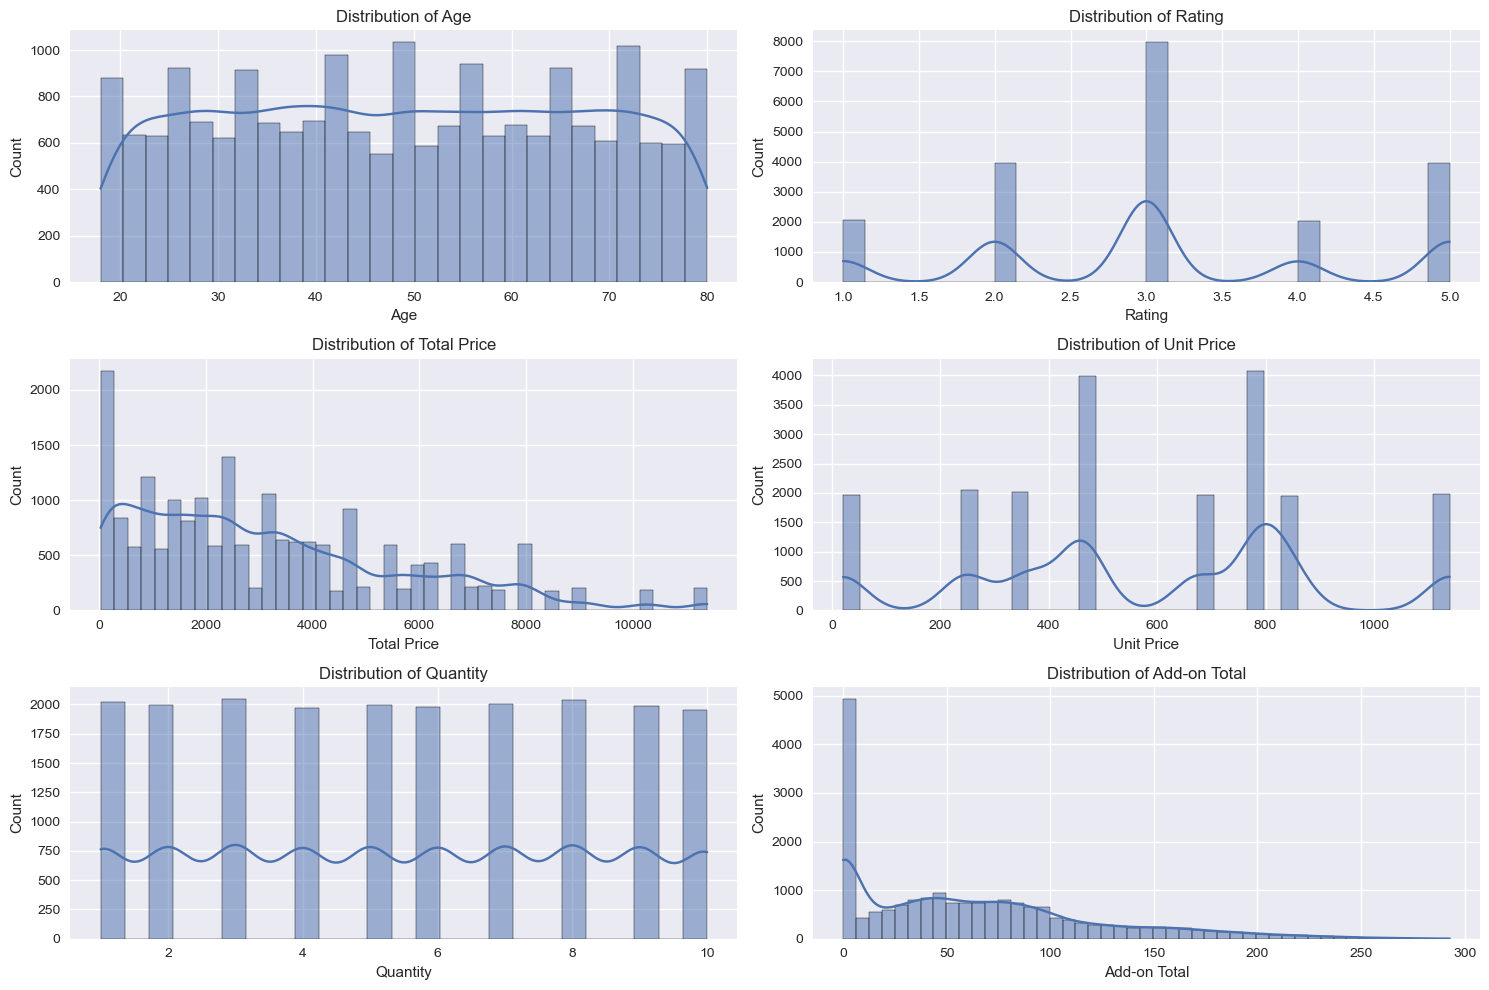

In [8]:
# Thiết lập style cho đồ thị  
plt.style.use('seaborn')  
fig, axes = plt.subplots(3, 2, figsize=(15, 10))  

# 1. Histogram cho biến số  
numeric_cols = sales_df.select_dtypes(include=['int64', 'float64']).columns  
for i, col in enumerate(numeric_cols.drop('Customer ID')):
    if i < 8:  # Giới hạn 4 biểu đồ  
        row = i // 2  
        col_idx = i % 2  
        sns.histplot(sales_df[col], ax=axes[row, col_idx], kde=True)  
        axes[row, col_idx].set_title(f'Distribution of {col}')  

plt.tight_layout()  
plt.show()  

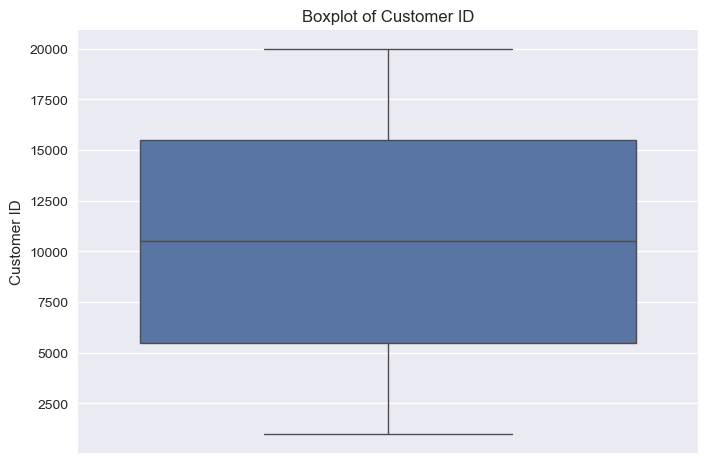

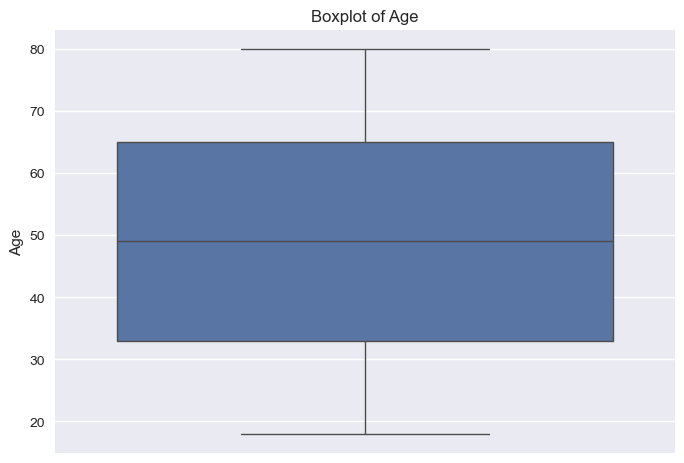

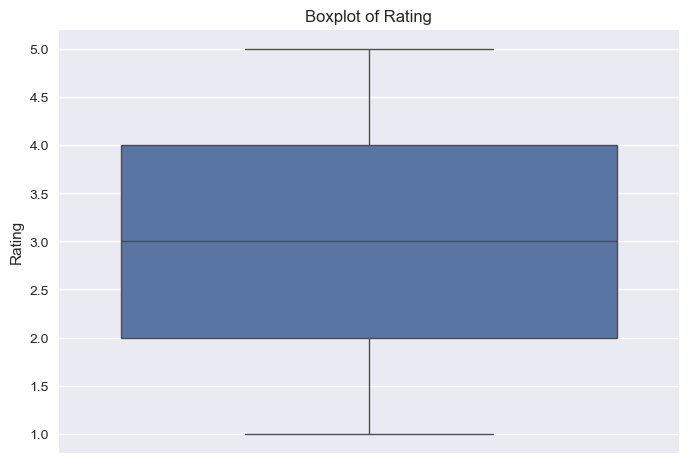

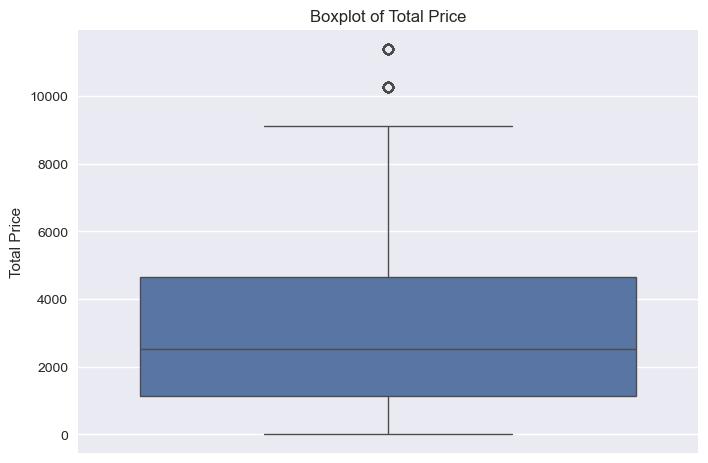

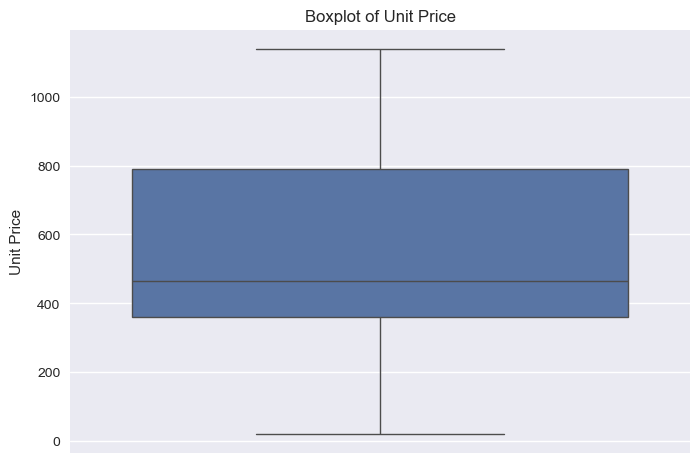

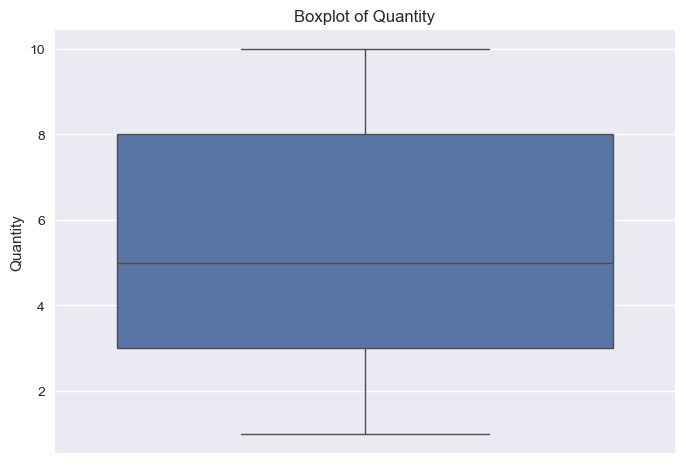

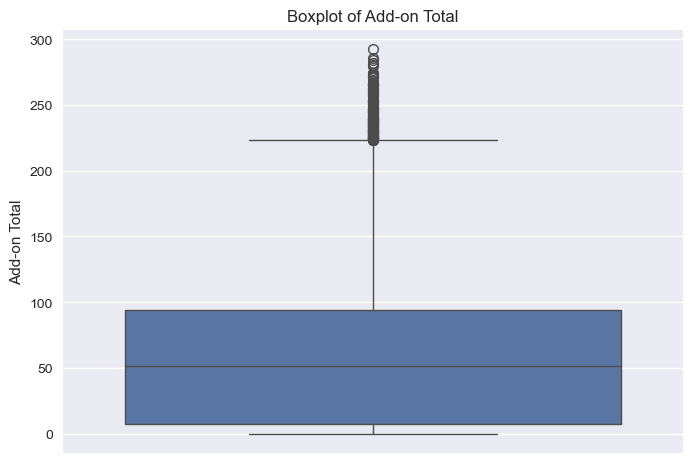

In [9]:
# 2. Box plot cho biến số  
for i, col in enumerate(numeric_cols):  
	# new figure for each column
	plt.figure(i)  
	sns.boxplot(y=sales_df[col])  
	plt.title(f'Boxplot of {col}')

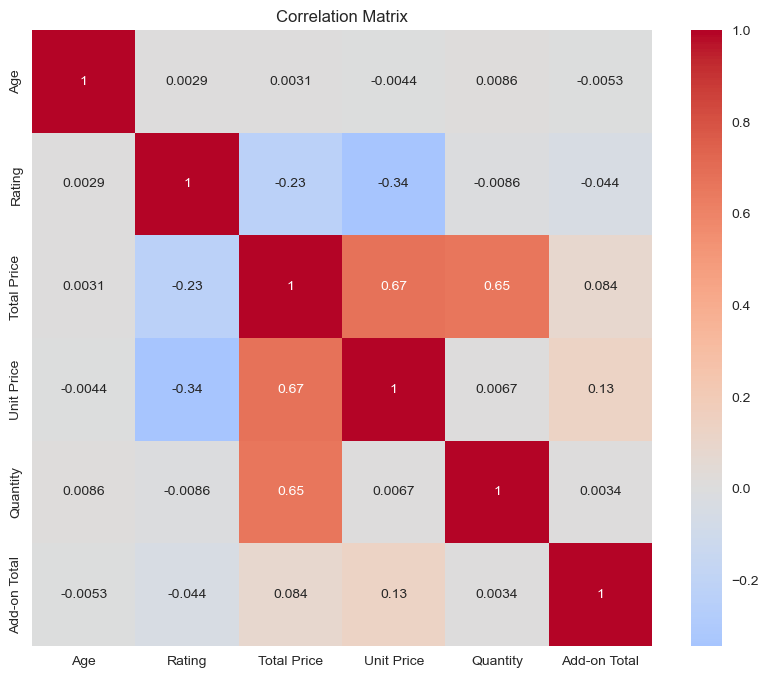

In [10]:
# Tạo ma trận tương quan cho các biến số  
numeric_df = sales_df.select_dtypes(include=['int64', 'float64']).drop('Customer ID', axis=1)
corr_matrix = numeric_df.corr()  

# Vẽ heatmap  
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)  
plt.title('Correlation Matrix')  
plt.show()

<Axes: >

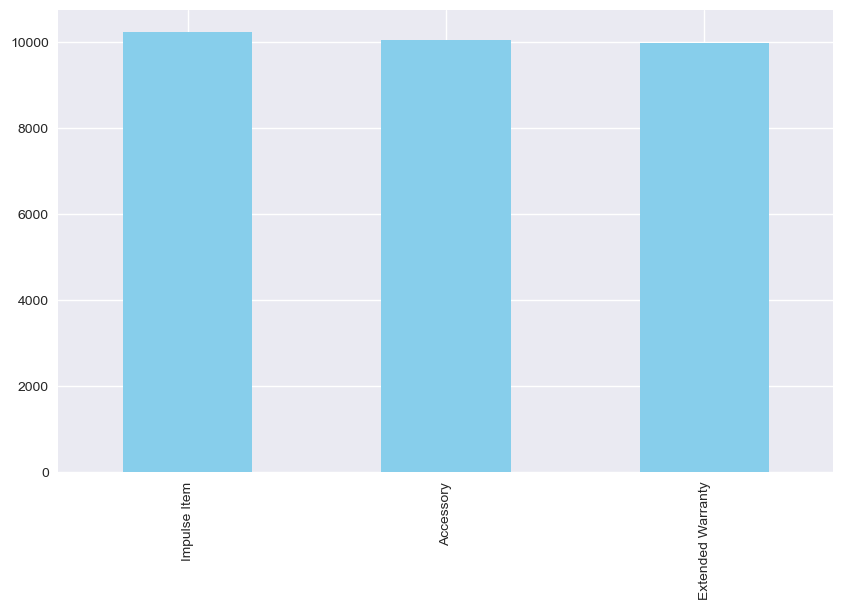

In [12]:
# Frequncy of Add-ons Purchased
addons = sales_df['Add-ons Purchased'].str.split(',').explode().str.strip().value_counts()
addons.plot(kind='bar', figsize=(10, 6), color='skyblue')

## **3. Asking Meaning Questions** 

## **4. Pre-processing & Analyzing Data to Answer each Questions** 

## **5. Reflection**

## **References**